This is the collection of codes that explore the food atlas datasets and CDC datasets

The codes are written to explore the datasets and test the following hypothesis:

i.	Is there a pattern of how the food choice, physical activity and diabetes and obesity prevalence differ by states or counties?

ii.	Is there a noticeable variation in the food choice, health condition by states or by counties within each state?

iii. Does low access to grocery and supercenter correlate with high diabetes and obesity prevalence? How is the correlation for the overall population? Or in different states or areas of US?

iv.	Does the type of local stores correlate with high diabetes and obesity prevalence? How is the correlation for the overall population? Or in different states or areas of US?

v.	Do type of restaurants correlate with high diabetes and obesity prevalence? How is the correlation for the overall population? Or in different states or areas of US?

vi. Do food choice overall (defined as the combination of overall access to grocery store, type of local stores, and type of restaurants) correlate with high diabetes and obesity prevalence? How is the correlation for the overall population? Or in different states or areas of US?

vii.	Do level of physical activity correlate with high diabetes and obesity prevalence? How is the correlation for the overall population? Or in different states or areas of US?

viii. Do change in physical activity or food environment correlate with change in prevalence of diabetes and obesity? How is the correlation for the overall population? Or in different states or areas of US?

ix. Are there counties with both high level of physical activity and rich food choice but high prevalence of diabetes or obesity? Similarly, are there counties with low level of physical activity and poor food choice but relatively low prevalence of diabetes and obestiy (clustering analysis?) If there are, whether additional data can explain the unusual observation? 

x. Are there counties with small change in level of physical activity and food choice but great change in prevalence of diabetes or obesity? Or vice versa? If there are, whether additional data can explain the unusual observation? 

This document is broken into five sections: 

I. Importing packages and Defining functions for analysis
II. Testing hypothesis i & ii
III. Testing hypothesis iii-vi
IV. Testing hypothesis vii
V. Testing hypothesis ix and x


Section I. Importing packages, Defining functions for analysis and import datasets

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
##define functions

#Define function Boxplot_by_state() to draw boxplot by a groups: State, Areas with differnet composition of age group, socioeconomics, or their combinations

##### df: dataframe to read in, col:the col category by which the data is grouped, vert: direction of boxplot, 0 for horizontal and 1 for vertical
def Boxplot_by_state(df, col, by, vert):
    by_values=list(set(df[by]))
    by_values.sort()
    plt.figure(figsize=(18, 16))   
    boxes=list()
    for v in by_values:
        df_one_type=df[df[by]==v]
        boxes.append(list(df_one_type[col]))
    plt.boxplot(boxes,vert=vert)
    plt.yticks(range(1,len(by_values)+1), by_values)
    

            
#construct variable info dictionary for analysis
from collections import defaultdict

url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/Food_atlas/variable_info.csv'
var_info_df=pd.read_csv(url,encoding="ISO-8859-1")
var_info_dict=dict()

for idx in var_info_df.index:
    
    k1=var_info_df['Category Name'][idx]
    k2=var_info_df['Category Code'][idx]
    k3=var_info_df['Sub_subcategory Name'][idx]
    k4=var_info_df['Units'][idx]
    var=var_info_df['Variable Code'][idx]
    
    if k3==np.nan:
        k3='Overall'
    var_info_dict[var]=[k1,k2,k3,k4]   
    

#create a subset of dataframe by category
def Df_subset(df, category,var_info_dict):
    vars_to_drop=[]
    for c in df_food.columns:
        if c not in ['State','County']:
            if var_info_dict[c][1] !=category:
                vars_to_drop.append(c)

    df_sub=df.drop(vars_to_drop, axis=1)
    return df_sub

Read food atlas dataset and CDC datasets and merge these two datasets

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

food_atlas_url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/Food_atlas/df_tp_1.csv'
cdc_diabetes_url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/CDC/Diabetes_prevalence.csv'
cdc_obesity_url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/CDC/Obesity_prevalence.csv'
cdc_phy_url='https://raw.githubusercontent.com/cathyxinxyz/Capstone_Project_1/master/Datasets/CDC/Physical_inactive_prevalence.csv'

df_food=pd.read_csv(food_atlas_url,index_col='FIPS',encoding="ISO-8859-1")
df_db=pd.read_csv(cdc_diabetes_url,index_col='FIPS',encoding="ISO-8859-1")
df_ob=pd.read_csv(cdc_obesity_url,index_col='FIPS',encoding="ISO-8859-1")
df_phy=pd.read_csv(cdc_phy_url,index_col='FIPS',encoding="ISO-8859-1")

In [13]:
#break df_food into eight categories for analysis
df_access=Df_subset(df_food, 'ACCESS',var_info_dict)
df_rest=Df_subset(df_food, 'RESTAURANTS',var_info_dict)  
df_sto=Df_subset(df_food,'STORES',var_info_dict)
df_loc=Df_subset(df_food,'LOCAL',var_info_dict)
df_ins=Df_subset(df_food,'INSECURITY',var_info_dict)
df_rec=Df_subset(df_food,'HEALTH',var_info_dict)

II. Testing hypothesis:
    i.	Is there a pattern of how the food choice, physical activity and diabetes and obesity prevalence differ by states or counties?

    ii.	Is there a noticeable variation in the food choice, health condition by states or by counties within each state?

In [14]:
df_access.describe()

,PCT_LACCESS_POP10,PCT_LACCESS_LOWI10,PCT_LACCESS_HHNV10,PCT_LACCESS_SNAP15,PCT_LACCESS_CHILD10,PCT_LACCESS_SENIORS10
count,3118.000000,3143.000000,3143.000000,3123.000000,3143.000000,3143.000000
mean,22.946432,8.374953,3.154496,2.917896,5.505321,3.915474
std,19.134196,8.214988,3.207105,3.160642,4.880426,4.215192
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.723482,3.442171,1.609832,1.132022,2.396962,1.585764
50%,19.567871,6.150772,2.572299,2.128783,4.444210,2.827295
75%,29.254677,10.324935,3.806324,3.668171,6.964972,4.521918
max,100.000000,72.274456,68.470405,37.254488,34.015595,29.208633


In [54]:
df_access['Overall']=df_access['PCT_LACCESS_POP10']
df_access['Senior']=df_access['PCT_LACCESS_SENIORS10']
df_access['Child']=df_access['PCT_LACCESS_CHILD10']
df_access['Adult']=df_access['Overall']-df_access['Child']

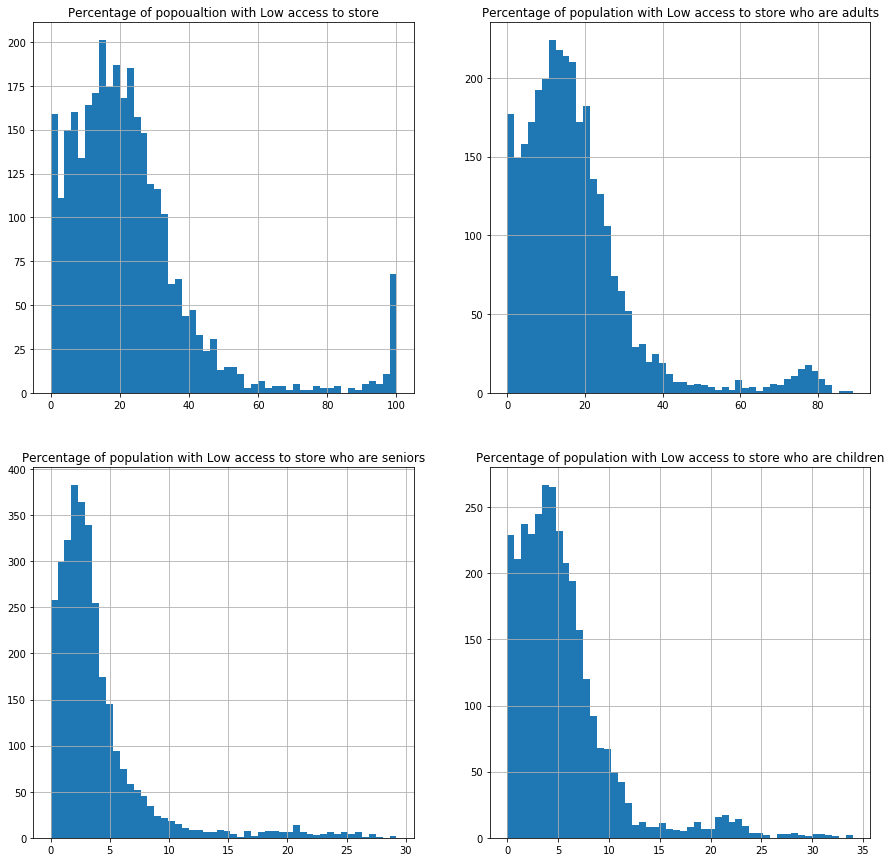

In [80]:
plt.figure(figsize=(15, 15)) 

plt.subplot(2,2,1)
plt.title('Percentage of popoualtion with Low access to store')
df_access['Overall'].hist(bins=50)
plt.legend()


plt.subplot(2,2,2)
plt.title('Percentage of population with Low access to store who are adults')
df_access['Adult'].hist(bins=50)
plt.legend()
#plt.show()

plt.subplot(2,2,3)
plt.title('Percentage of population with Low access to store who are seniors')
df_access['Senior'].hist(bins=50)
plt.legend()
#plt.show()

plt.subplot(2,2,4)
plt.title('Percentage of population with Low access to store who are children')
df_access['Child'].hist(bins=50)
plt.legend()
plt.show()

C:\anaconda\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


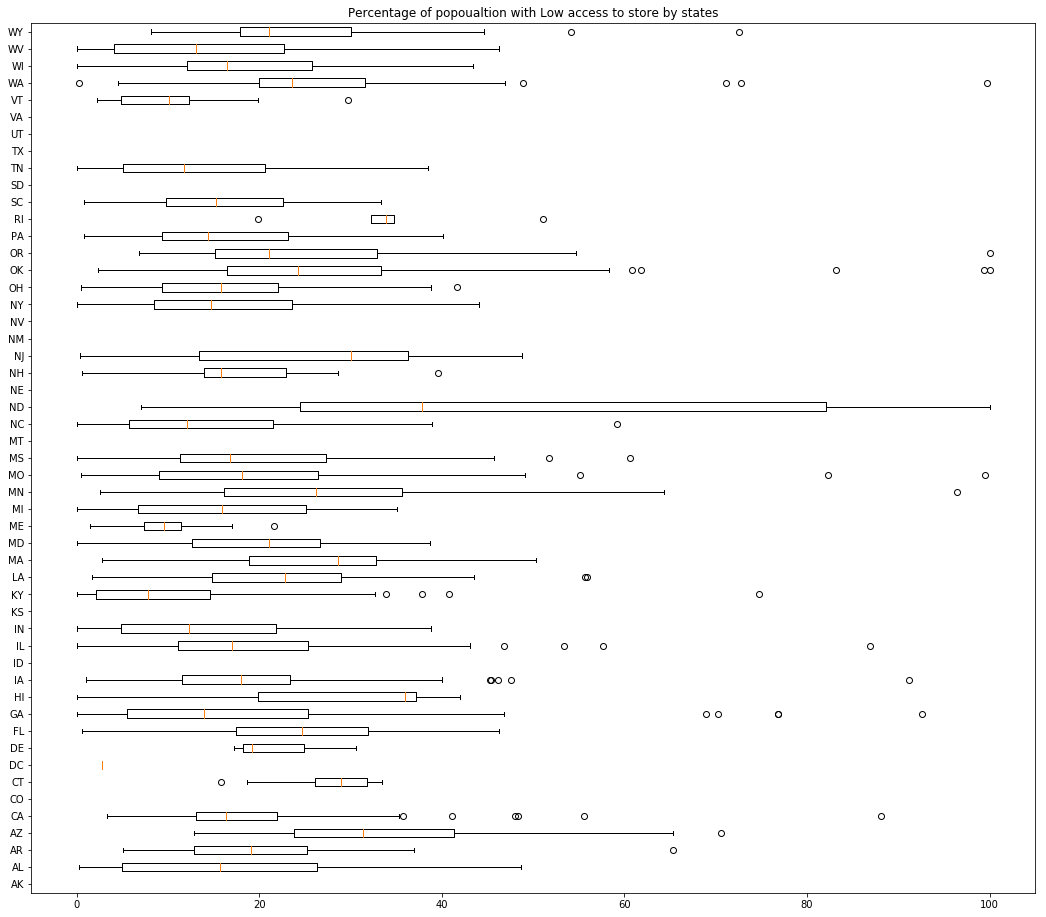

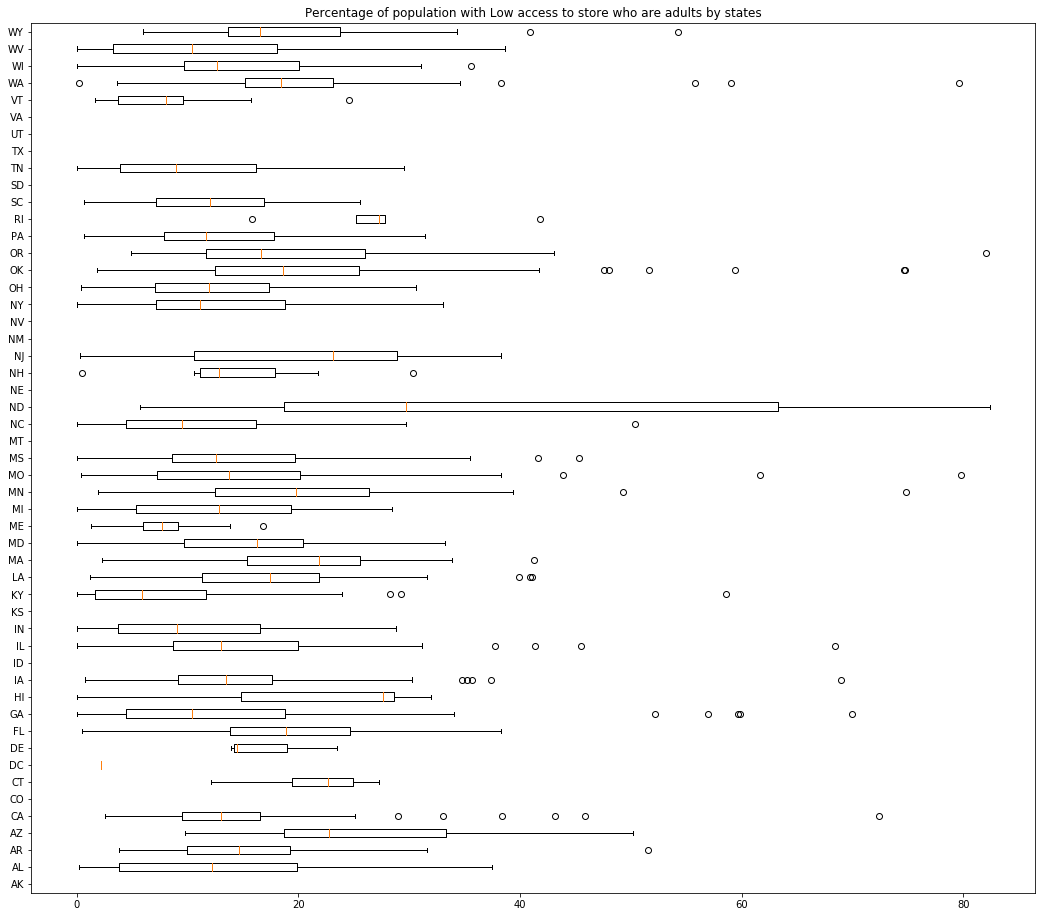

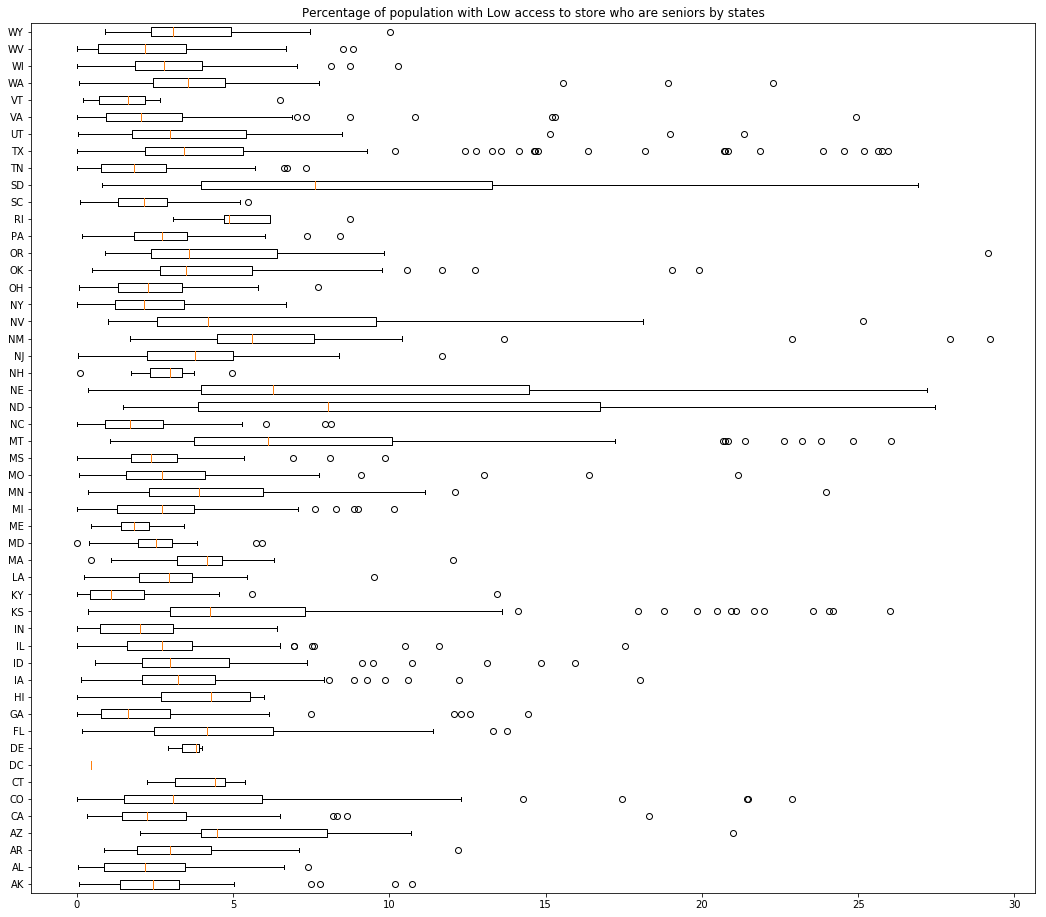

In [58]:
Boxplot_by_state(df_access, col='Overall', by='State', vert=0)
plt.title('Percentage of popoualtion with Low access to store by states')
plt.legend()
plt.show()


Boxplot_by_state(df_access, col='Adult', by='State', vert=0)
plt.title('Percentage of population with Low access to store who are adults by states')
plt.legend()
plt.show()


Boxplot_by_state(df_access, col='Senior', by='State', vert=0)
plt.title('Percentage of population with Low access to store who are seniors by states')
plt.legend()
plt.show()

In [61]:
#'FFRPTH09' is the number of fast food restaurant per 1000 pop and 'FSRPTH09' is the number of full service restaurant per 1000 pop
df_rest.describe()
df_rest['Fast_food']=df_rest['FFRPTH09']
df_rest['Full_service']=df_rest['FSRPTH09']
df_rest['Percentage_fast_food']=df_rest['Fast_food']/(df_rest['Fast_food']+df_rest['Full_service'])

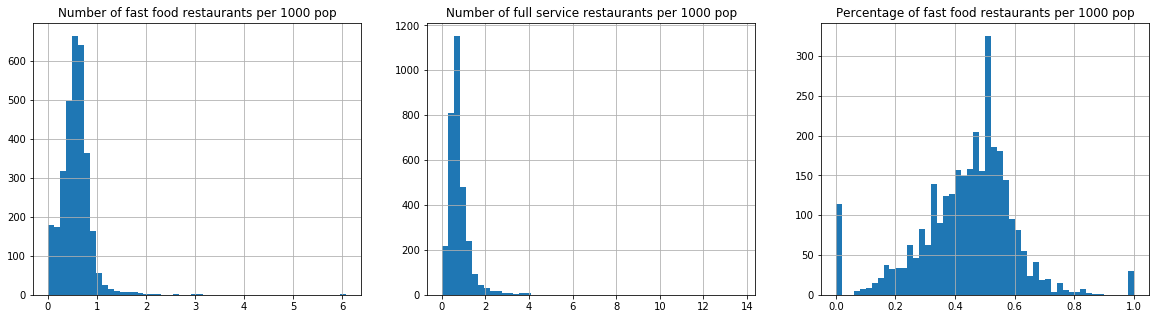

In [77]:
plt.figure(figsize=(20, 5))   
plt.subplot(1,3,1)
plt.title('Number of fast food restaurants per 1000 pop')
df_rest['Fast_food'].hist(bins=50)
plt.legend()


plt.subplot(1,3,2)
plt.title('Number of full service restaurants per 1000 pop')
df_rest['Full_service'].hist(bins=50)
plt.legend()


plt.subplot(1,3,3)
plt.title('Percentage of fast food restaurants per 1000 pop')
df_rest['Percentage_fast_food'].hist(bins=50)
plt.legend()
plt.show()

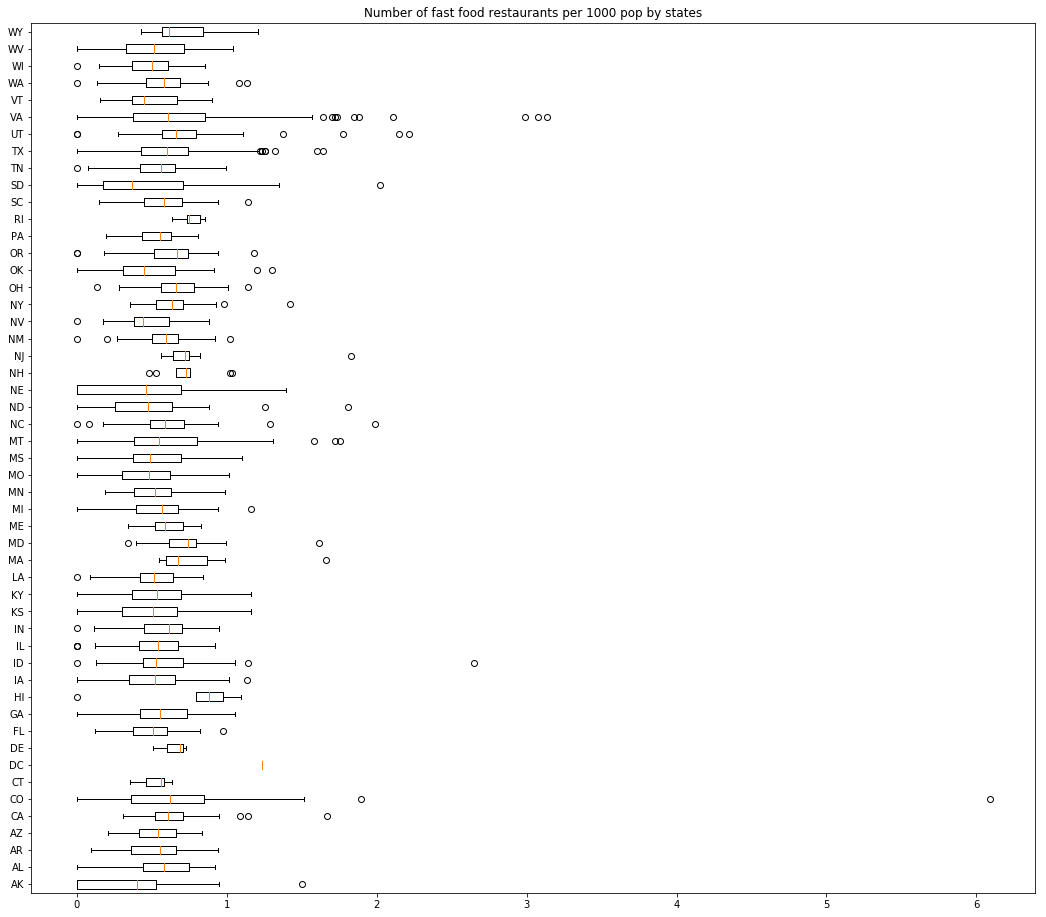

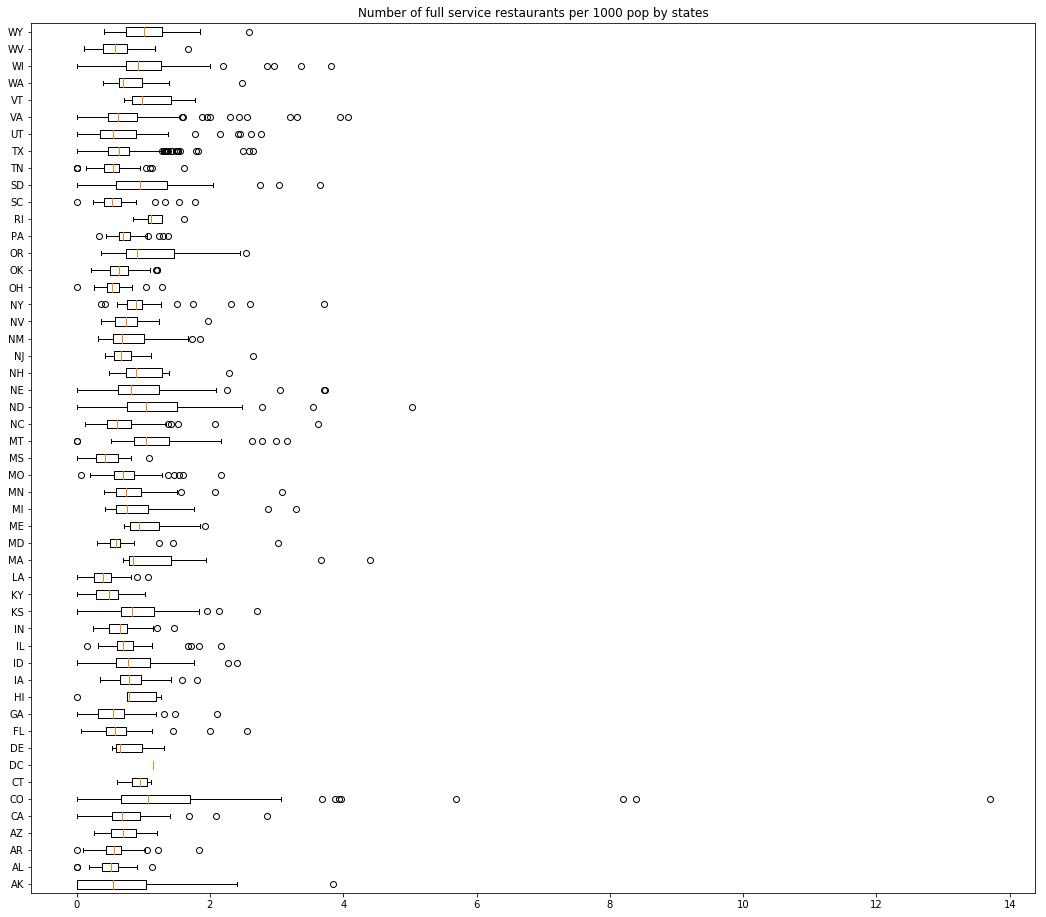

C:\anaconda\lib\site-packages\numpy\lib\function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1857: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1864: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1873: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


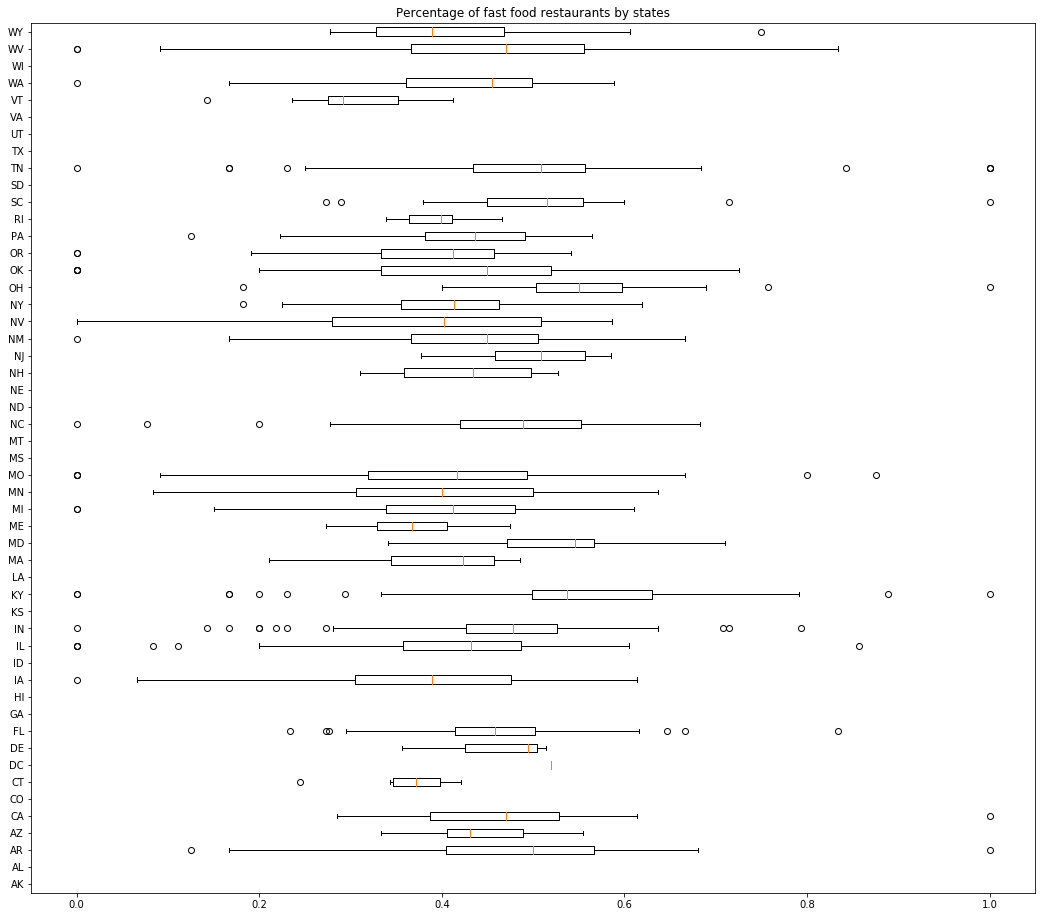

In [65]:
Boxplot_by_state(df_rest, col='Fast_food', by='State', vert=0)
plt.title('Number of fast food restaurants per 1000 pop by states')
plt.legend()
plt.show()


Boxplot_by_state(df_rest, col='Full_service', by='State', vert=0)
plt.title('Number of full service restaurants per 1000 pop by states')
plt.legend()
plt.show()


Boxplot_by_state(df_rest, col='Percentage_fast_food', by='State', vert=0)
plt.title('Percentage of fast food restaurants by states')
plt.legend()
plt.show()

In [44]:
df_sto.describe()

,GROCPTH09,SUPERCPTH09,CONVSPTH09,SPECSPTH09,SNAPSPTH12,WICSPTH08
count,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,0.268142,0.015581,0.600116,0.056792,0.880064,0.255593
std,0.227271,0.020936,0.309923,0.075752,0.387638,0.257250
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.149711,0.000000,0.406012,0.000000,0.629603,0.123272
50%,0.206697,0.007298,0.550178,0.043577,0.818400,0.189785
75%,0.305616,0.025621,0.727262,0.083710,1.066786,0.296110
max,3.073770,0.256213,3.121748,1.366120,6.658001,4.618937


In [48]:
#create new variables: percentage of (grocery + supercenter)/(grocery + supercenter+convenience)
df_sto['percentage_grocery_super']=(df_sto['GROCPTH09']+df_sto['SUPERCPTH09'])/(df_sto['GROCPTH09']+df_sto['SUPERCPTH09']+df_sto['CONVSPTH09'])
df_sto['grocery_super']=df_sto['GROCPTH09']+df_sto['SUPERCPTH09']
df_sto['assist']=df_sto['SNAPSPTH12']+df_sto['WICSPTH08']

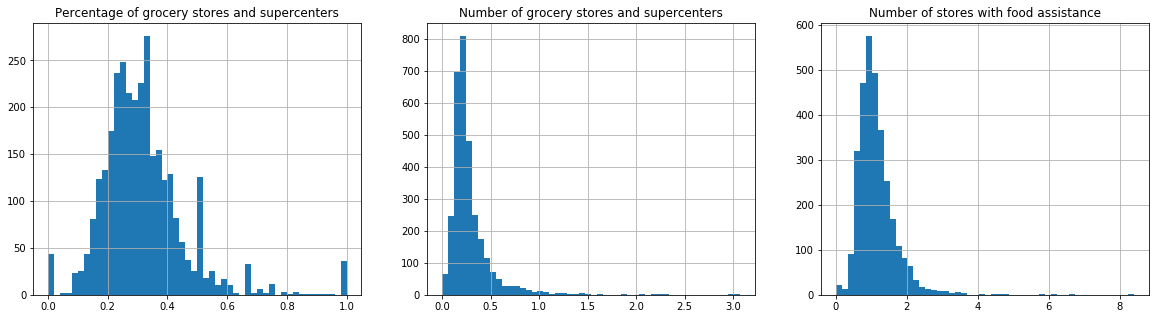

In [74]:
plt.figure(figsize=(20, 5))   

plt.subplot(1,3,1)
plt.title('Percentage of grocery stores and supercenters')
df_sto['percentage_grocery_super'].hist(bins=50)
plt.legend()
#plt.show()

plt.subplot(1,3,2)
plt.title('Number of grocery stores and supercenters')
df_sto['grocery_super'].hist(bins=50)
plt.legend()
#plt.show()

plt.subplot(1,3,3)
plt.title('Number of stores with food assistance')
df_sto['assist'].hist(bins=50)
plt.legend()
plt.show()

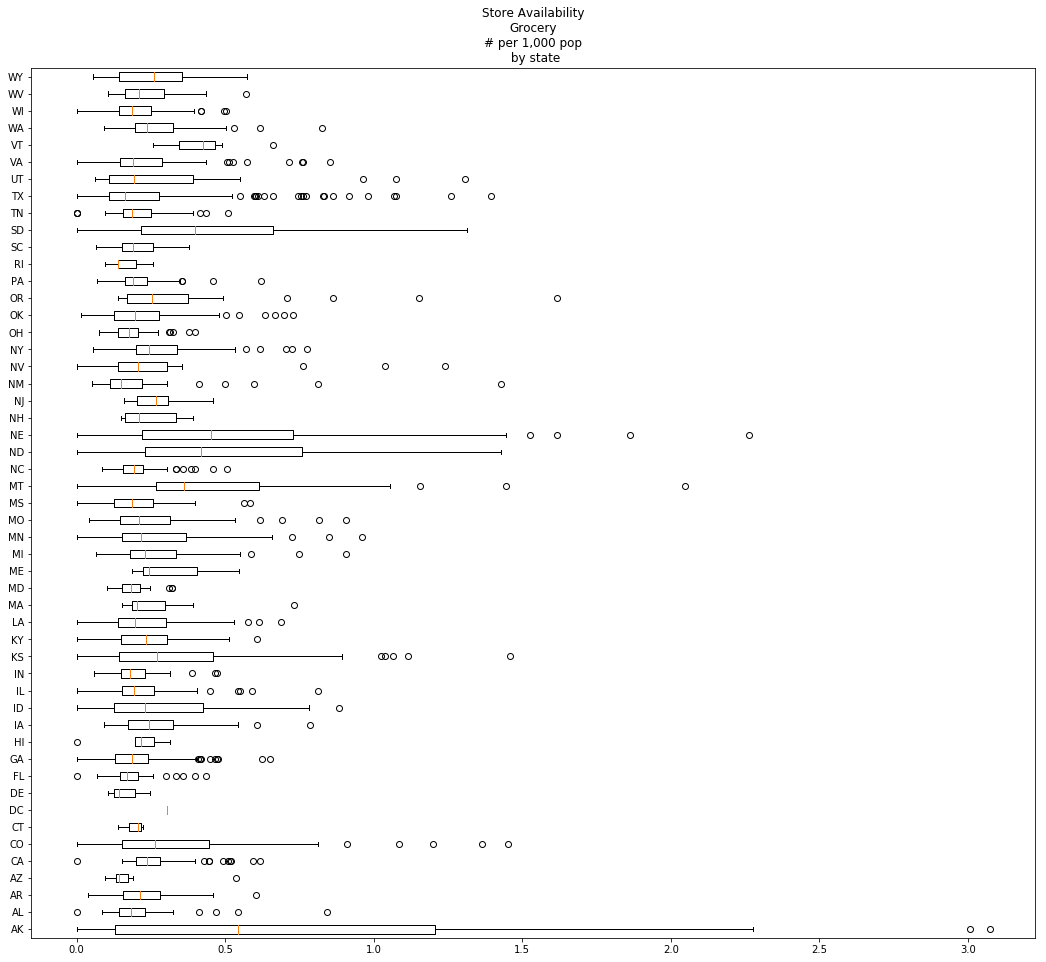

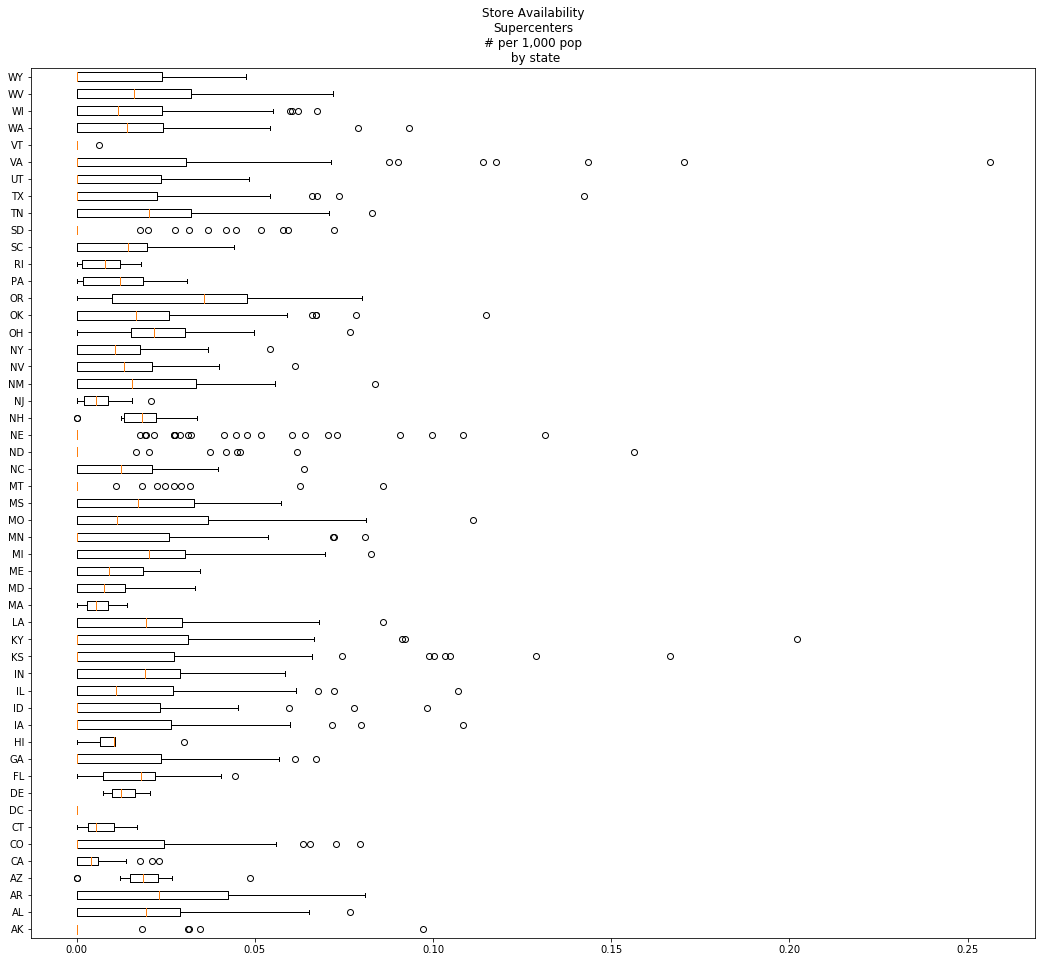

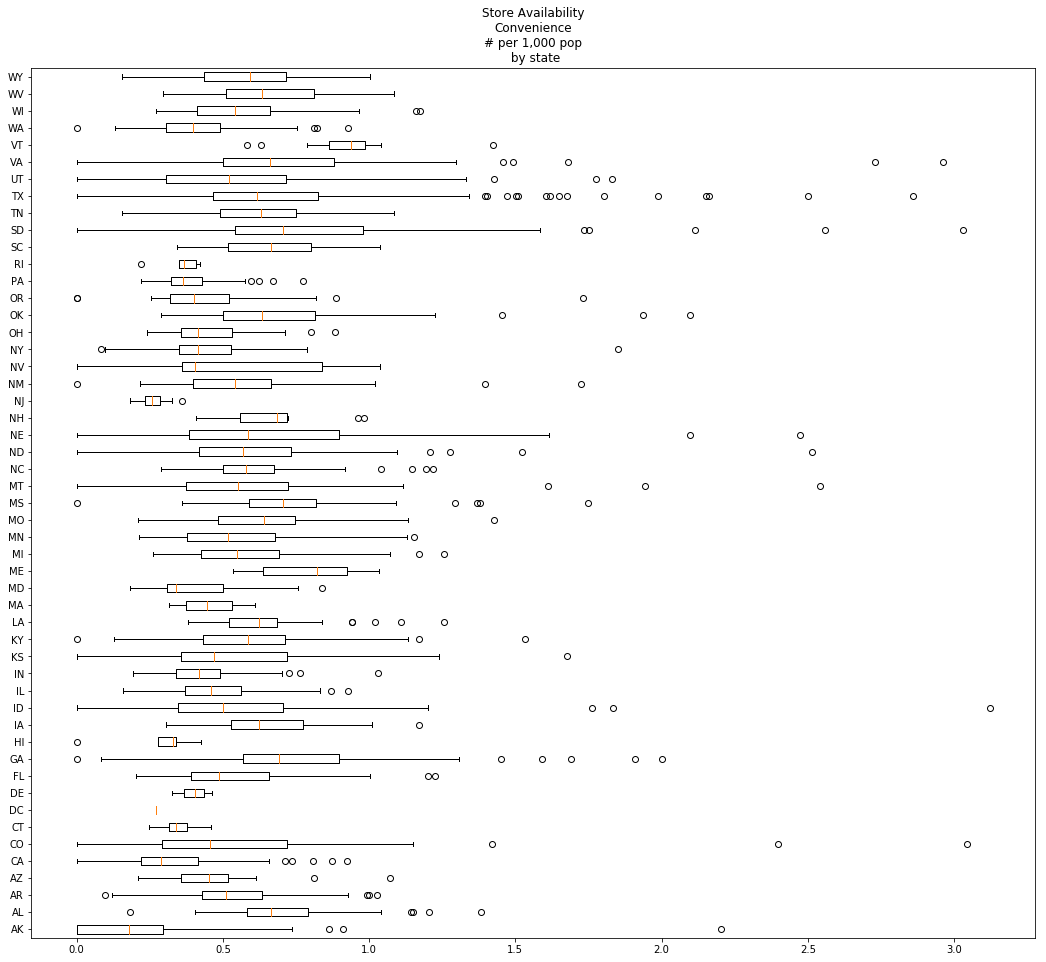

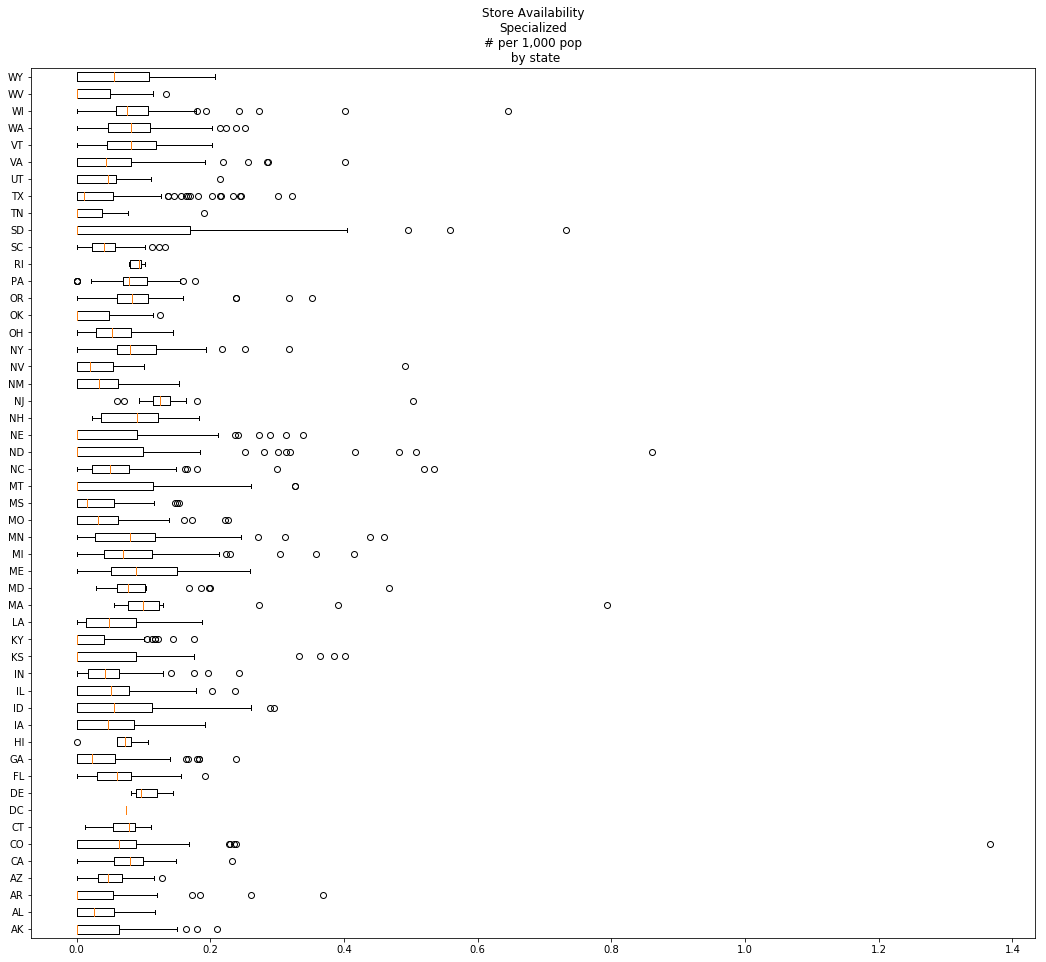

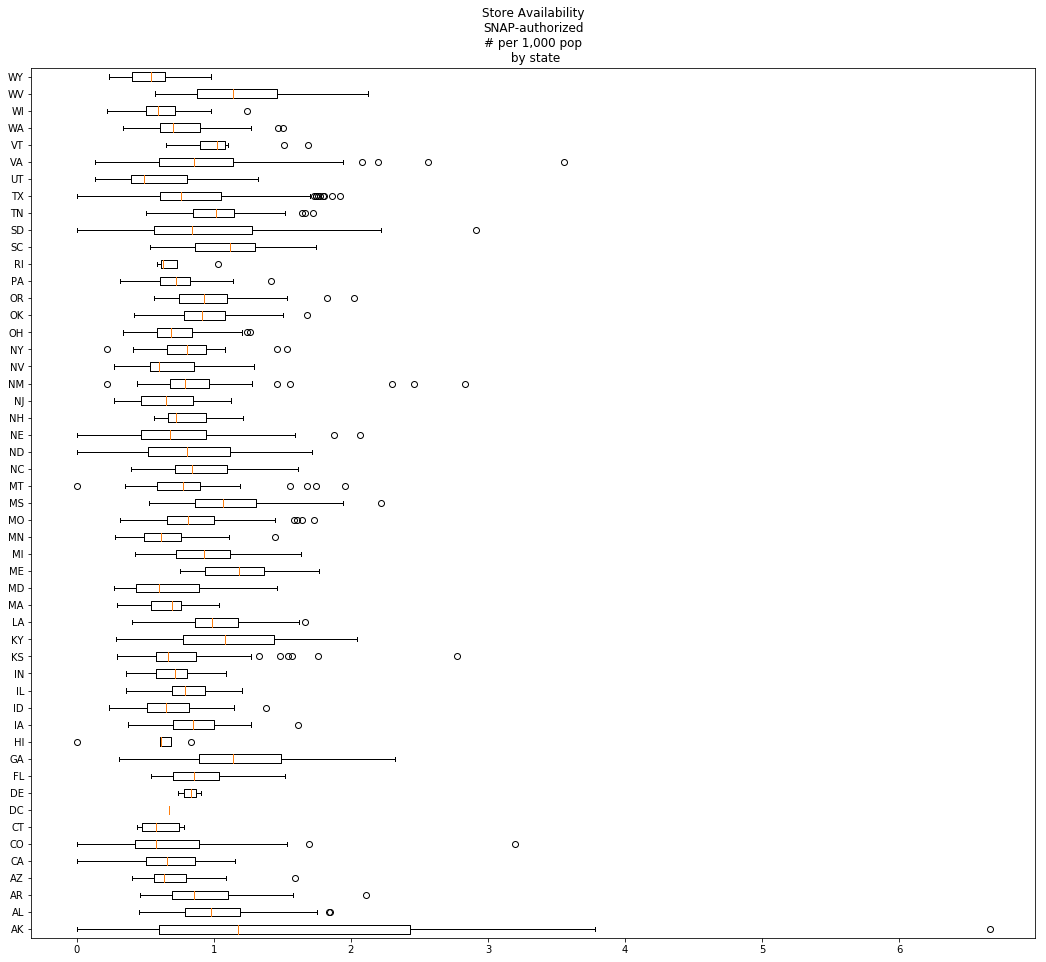

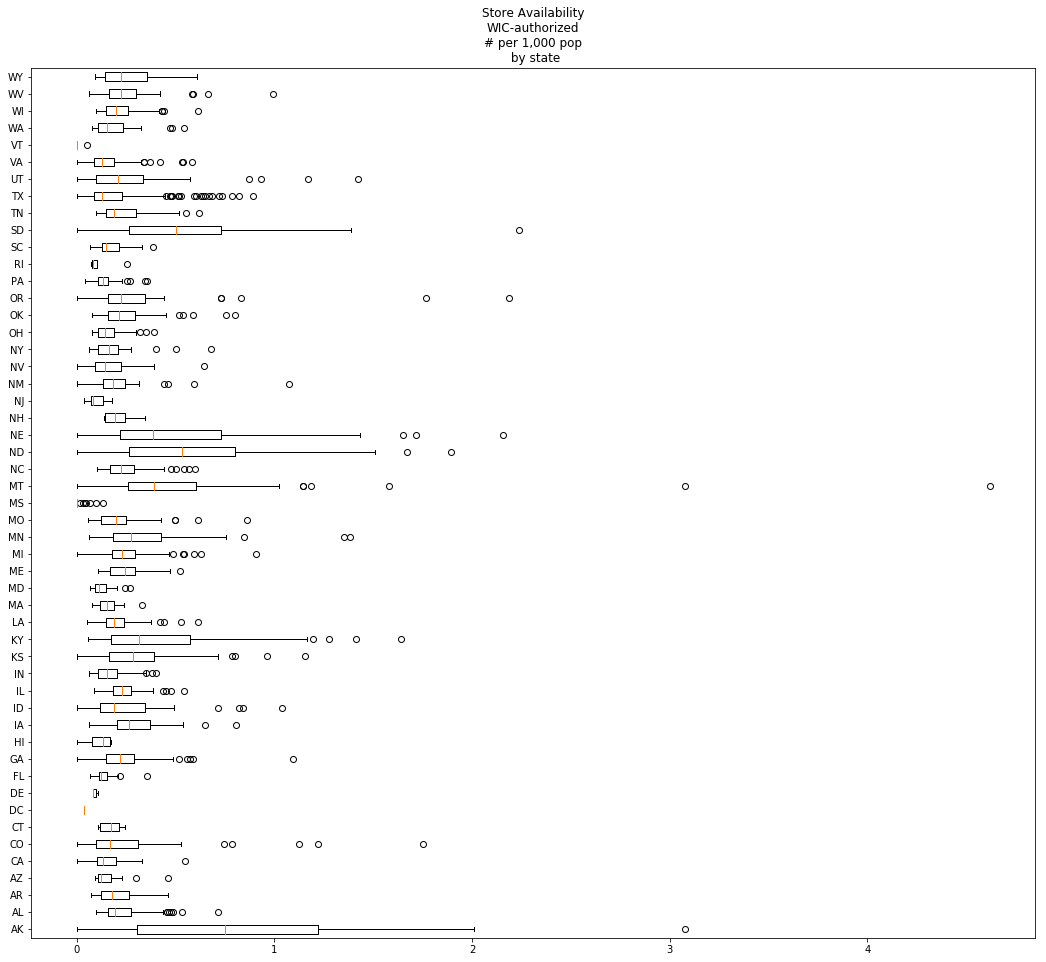

In [45]:
Boxplot_by_state(df_rest, col='Fast_food', by='State', vert=0)
plt.title('Number of fast food restaurants per 1000 pop by states')
plt.legend()
plt.show()


Boxplot_by_state(df_rest, col='Full_service', by='State', vert=0)
plt.title('Number of full service restaurants per 1000 pop by states')
plt.legend()
plt.show()


Boxplot_by_state(df_rest, col='Percentage_fast_food', by='State', vert=0)
plt.title('Percentage of fast food restaurants by states')
plt.legend()
plt.show()

In [89]:
df_ins['Low']=df_ins['FOODINSEC_10_12']
df_ins['Very_low']=df_ins['VLFOODSEC_10_12']
df_ins.describe()

,FOODINSEC_10_12,VLFOODSEC_10_12,FOODINSEC_CHILD_01_07,Low,Very_low,Overall
count,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000,3143.000000
mean,15.024881,5.800000,8.580942,15.024881,5.800000,20.824881
std,2.378480,0.862656,1.893813,2.378480,0.862656,3.074260
min,8.700000,3.200000,4.800000,8.700000,3.200000,12.100000
25%,13.400000,5.100000,7.200000,13.400000,5.100000,18.700000
50%,14.900000,5.700000,8.300000,14.900000,5.700000,20.500000
75%,16.600000,6.500000,9.500000,16.600000,6.500000,23.300000
max,20.900000,8.100000,12.600000,20.900000,8.100000,27.800000


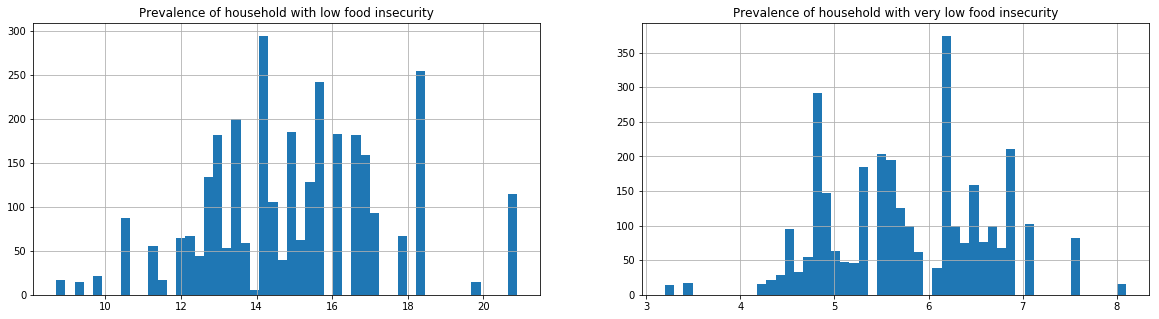

In [90]:
plt.figure(figsize=(20, 5))   

plt.subplot(1,2,1)
plt.title('Prevalence of household with low food insecurity')
df_ins['Low'].hist(bins=50)
plt.legend()
#plt.show()

plt.subplot(1,2,2)
plt.title('Prevalence of household with very low food insecurity')
df_ins['Very_low'].hist(bins=50)
plt.legend()
plt.show()

In [182]:
df_rec.describe()

,RECFACPTH09
count,3143.000000
mean,0.077687
std,0.078917
min,0.000000
25%,0.000000
50%,0.070302
75%,0.112864
max,0.990099


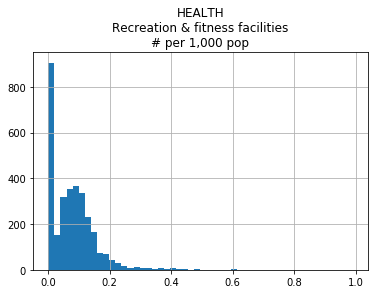

In [183]:
for c in df_rec.columns:
    if c not in ['State', 'County']:       
        df_rec[c].hist(bins=50)
        plt.title(str(var_info_dict[c][0])+'\n'+str(var_info_dict[c][1])+'\n'+str(var_info_dict[c][2]))
plt.legend()
plt.show()

In [186]:
df_db.describe()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,3224,3224,3224,3224,3224,3224,3224,3224,3224,3224
unique,122,127,130,133,132,141,145,152,157,164
top,7.9,8.6,9,9.4,9.5,11.1,9.7,11.3,11.2,9.5
freq,99,104,91,84,84,69,72,65,64,61


In [189]:
for c in df_db.columns:
    print(c, sum(df_phy.applymap(lambda x: isinstance(x, (int, float)))[c]))

2004 0
2005 0
2006 0
2007 0
2008 0
2009 0
2010 0
2011 0
2012 78
2013 78


In [99]:
df_db=df_db.replace('No Data', np.nan)

In [100]:
df_db=df_db.astype(float)

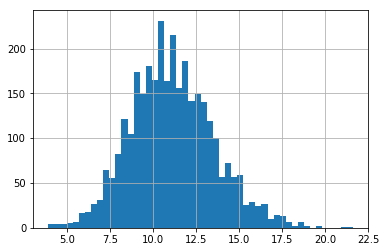

In [101]:
df_db['2011'].hist(bins=50)
plt.show()

In [202]:
df_ob.describe()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,3224,3224,3224,3224,3224,3224,3224,3146,3146,3146
unique,220,1185,243,241,245,259,260,265,267,267
top,No Data,No Data,No Data,No Data,No Data,No Data,No Data,30.6,31.5,32.6
freq,83,83,83,83,83,81,81,44,43,41


In [102]:
df_ob=df_ob.replace('No Data', np.nan)
df_ob=df_ob.astype(float)

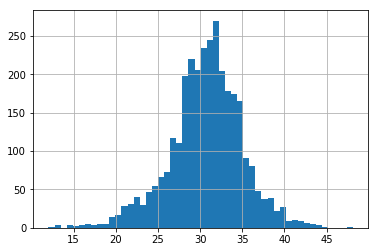

In [103]:
df_ob['2011'].hist(bins=50)
plt.show()

In [210]:
df_phy.describe()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,3224,3224,3224,3224,3224,3224,3224,3224,3146,3146
unique,281,272,288,280,275,275,285,283,291,277
top,No Data,No Data,No Data,No Data,No Data,No Data,No Data,No Data,28.4,25.5
freq,83,83,83,83,83,81,81,81,36,39


In [104]:
df_phy=df_phy.replace('No Data', np.nan)
df_phy=df_phy.astype(float)

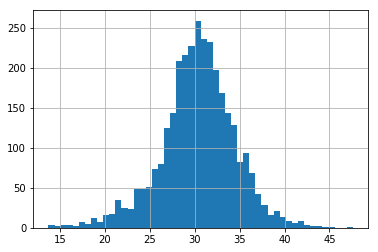

In [105]:
df_ob['2009'].hist(bins=50)
plt.show()

Bivariate analysis

In [262]:
#modify column names for bivariate analysis
df_db.columns=df_db.columns+'_db'
df_ob.columns=df_ob.columns+'_ob'
df_phy.columns=df_phy.columns+'_phy'

In [273]:
df_phy_db_ob=pd.concat([df_phy, df_db, df_ob],axis=1,join='inner')

In [274]:
print (df_phy_db_ob.head(5))
df_phy_db_ob=df_phy_db_ob.dropna(how='any')
df_phy_db_ob.describe()

      2004_phy  2005_phy  2006_phy  2007_phy  2008_phy  2009_phy  2010_phy  \
FIPS                                                                         
1001      31.9      31.0      31.5      33.0      32.7      32.2      29.4   
1003      26.8      25.8      26.2      24.5      25.2      25.1      27.6   
1005      34.3      36.1      34.8      34.0      34.9      34.2      35.0   
1007      28.4      31.5      35.4      36.0      36.6      37.2      37.0   
1009      29.8      30.3      30.3      32.2      34.6      35.9      35.0   

      2011_phy  2012_phy  2013_phy   ...     2004_ob  2005_ob  2006_ob  \
FIPS                                 ...                                 
1001      27.9      28.7      28.6   ...        30.2    28.87     27.9   
1003      25.2      25.2      22.3   ...        25.7    25.11     23.9   
1005      32.3      32.9      31.8   ...        31.7    33.04     36.5   
1007      33.2      33.2      33.9   ...        29.3    30.79     31.3   
1009     

,2004_phy,2005_phy,2006_phy,2007_phy,2008_phy,2009_phy,2010_phy,2011_phy,2012_phy,2013_phy,...,2004_ob,2005_ob,2006_ob,2007_ob,2008_ob,2009_ob,2010_ob,2011_ob,2012_ob,2013_ob
count,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,...,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000,3137.000000
mean,25.930252,25.908001,26.258240,26.704399,27.061715,27.857188,27.851833,27.002040,27.363787,25.959675,...,25.280140,26.174794,27.458750,28.282595,28.930858,30.335544,30.554096,30.689959,30.946509,31.016736
std,5.238437,5.200704,5.390439,5.097763,5.054458,5.154111,5.290733,5.321085,5.414048,5.200744,...,3.245854,3.396004,3.568665,3.627450,3.711698,4.161749,4.242740,4.342366,4.467809,4.525856
min,9.200000,9.600000,8.900000,9.800000,9.700000,10.100000,10.400000,9.200000,9.100000,8.100000,...,12.300000,11.730000,12.600000,12.500000,11.700000,13.700000,13.100000,12.000000,10.700000,11.800000
25%,22.600000,22.800000,22.900000,23.700000,24.100000,24.600000,24.500000,23.500000,23.900000,22.600000,...,23.900000,24.820000,26.000000,26.700000,27.200000,28.100000,28.300000,28.400000,28.500000,28.300000
50%,25.800000,25.700000,26.100000,26.800000,27.300000,28.200000,28.100000,27.300000,27.700000,25.800000,...,25.400000,26.250000,27.600000,28.500000,29.100000,30.500000,30.700000,30.900000,31.200000,31.200000
75%,29.100000,28.900000,29.500000,29.900000,30.100000,31.300000,31.400000,30.700000,30.900000,29.400000,...,26.900000,28.000000,29.400000,30.200000,31.000000,32.800000,33.100000,33.400000,33.700000,33.800000
max,42.400000,43.900000,44.700000,44.400000,44.800000,43.900000,44.900000,42.700000,41.700000,41.400000,...,38.000000,38.950000,41.900000,43.500000,43.700000,47.600000,47.900000,48.100000,46.600000,47.600000


C:\anaconda\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


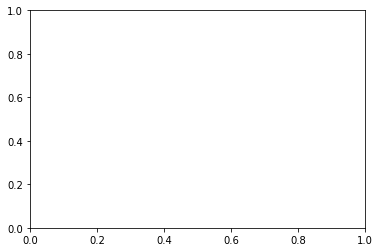

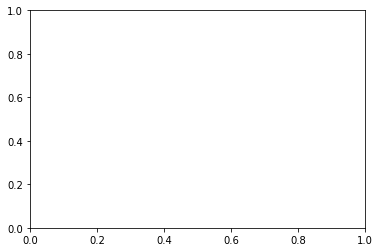

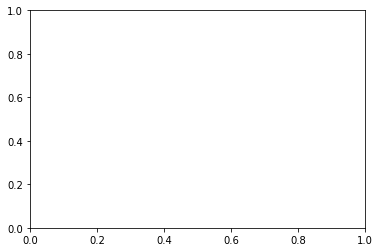

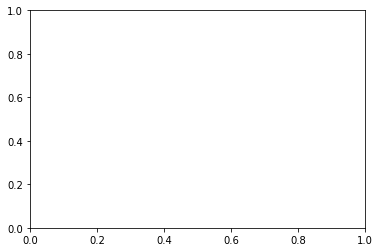

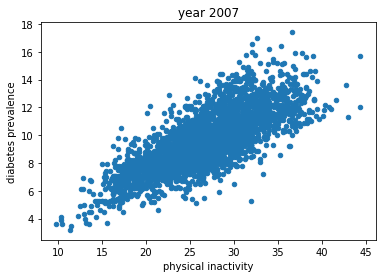

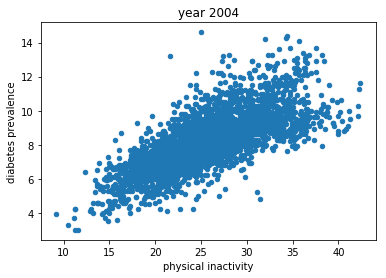

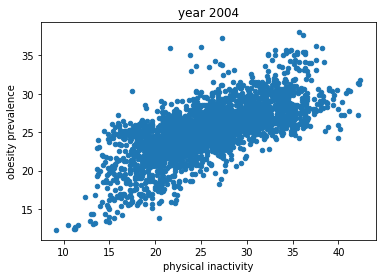

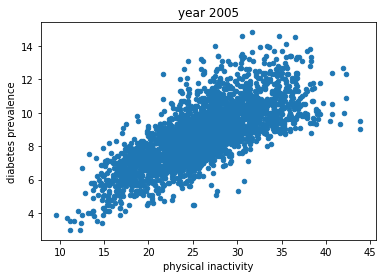

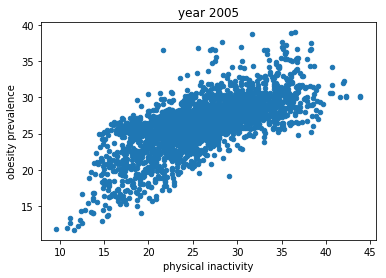

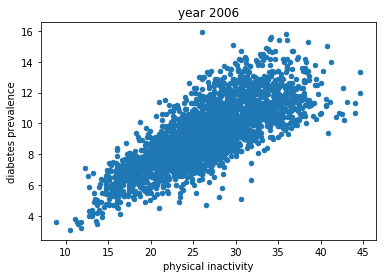

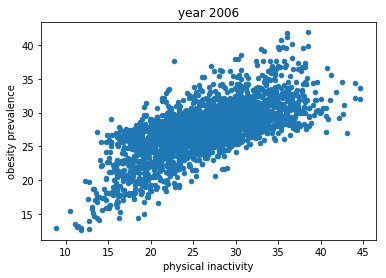

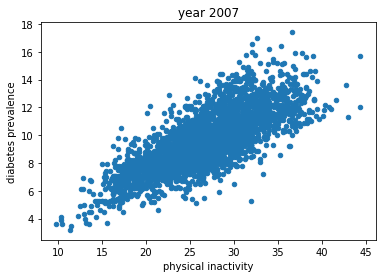

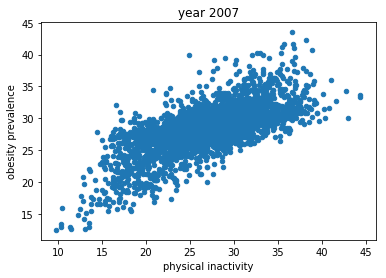

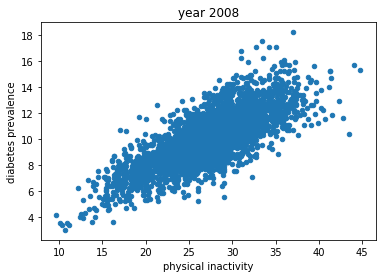

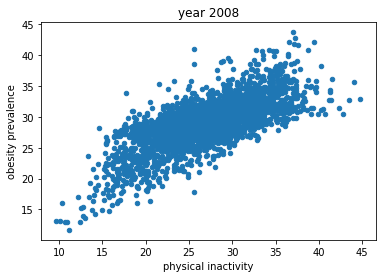

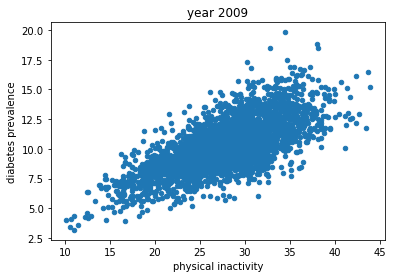

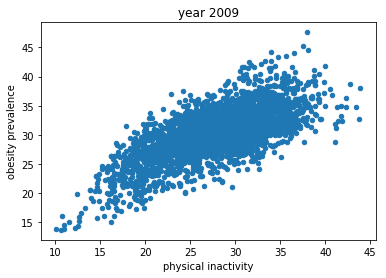

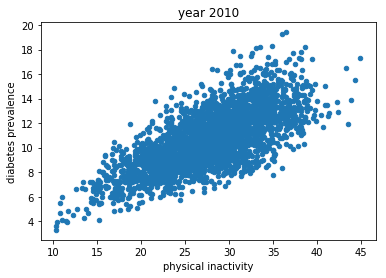

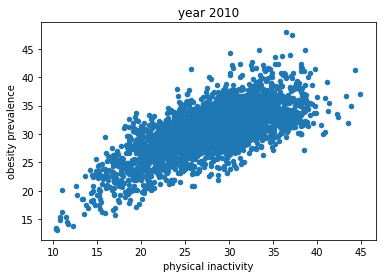

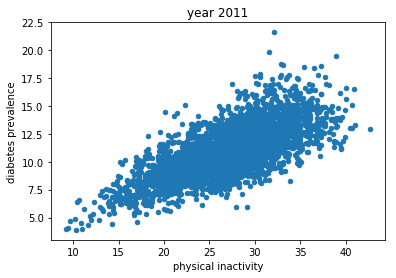

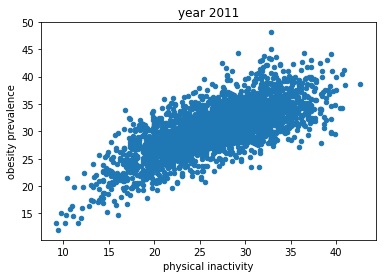

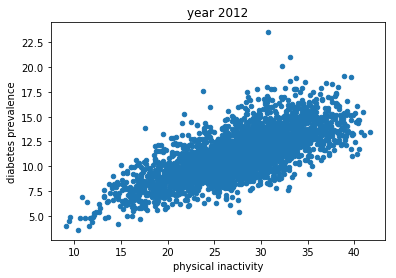

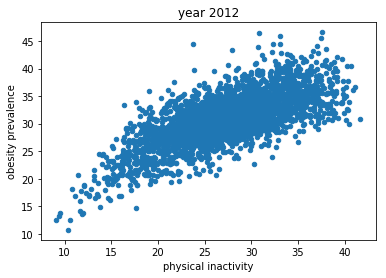

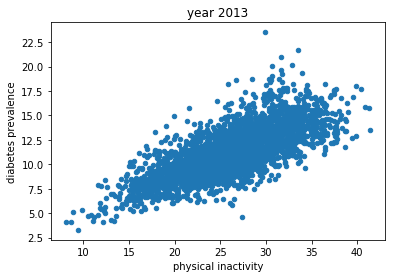

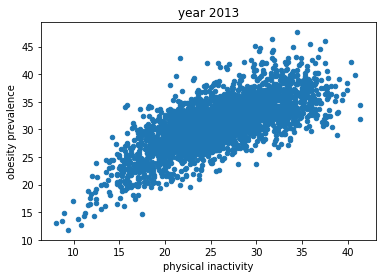

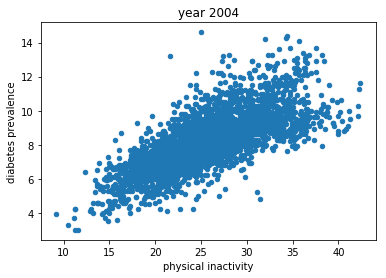

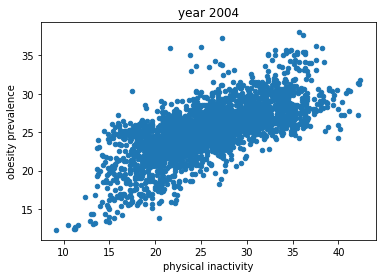

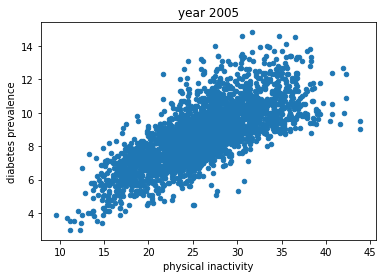

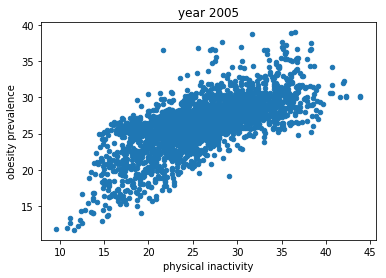

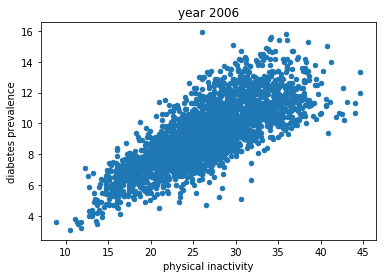

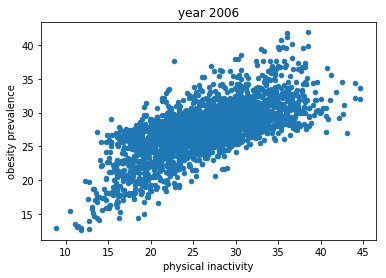

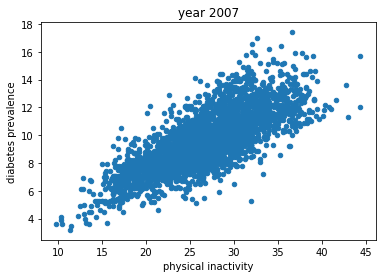

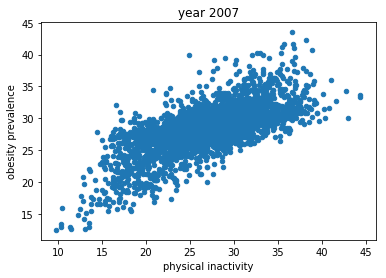

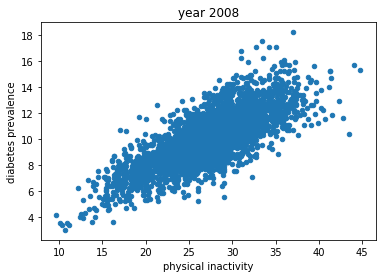

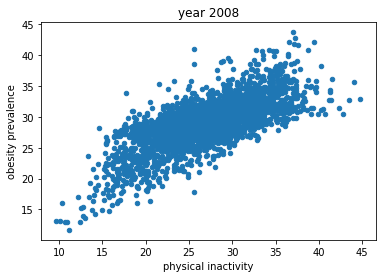

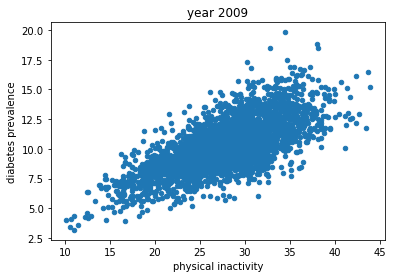

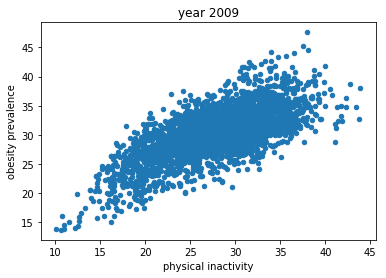

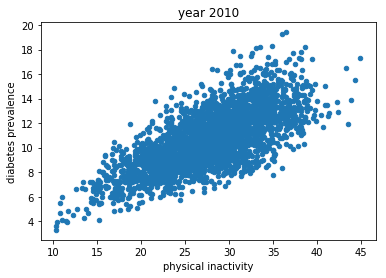

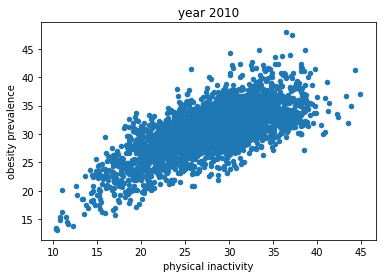

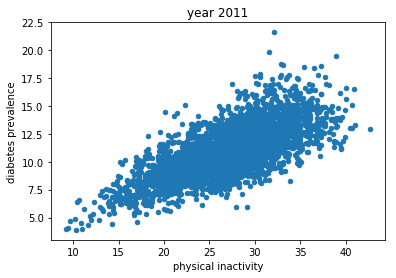

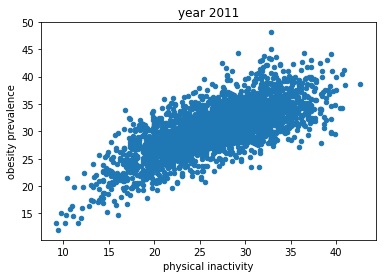

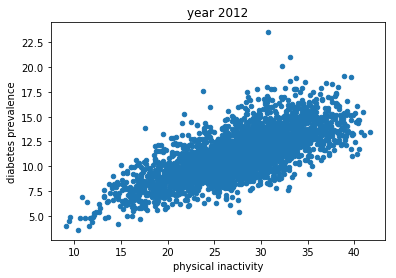

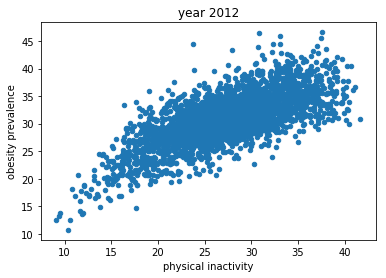

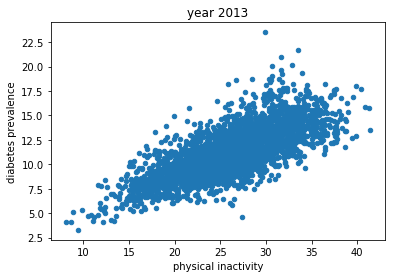

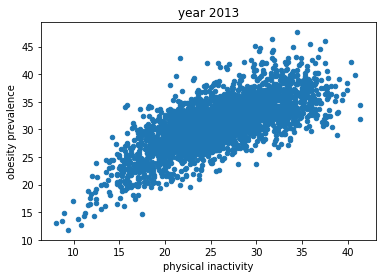

In [277]:
for year in range(2004, 2014):
    plt.figure()
    
    df_phy_db_ob.plot(x=str(year)+'_phy', y=str(year)+'_db', kind='scatter')
    plt.xlabel('physical inactivity')
    plt.ylabel('diabetes prevalence')
    plt.title('year '+str(year))
    
    plt.figure()
    df_phy_db_ob.plot(x=str(year)+'_phy', y=str(year)+'_ob', kind='scatter')
    plt.xlabel('physical inactivity')
    plt.ylabel('obesity prevalence')
    plt.title('year '+str(year))
plt.show()

In [135]:
#df_access_db=pd.concat([df_access, df_db],axis=1,join='inner')
#df_access_db=df_access_db.dropna()
#df_rest_db=pd.concat([df_rest, df_db],axis=1,join='inner')
#df_rest_ob=pd.concat([df_rest, df_ob],axis=1,join='inner')
#df_ins_db=pd.concat([df_ins, df_db],axis=1,join='inner')
#df_ins_ob=pd.concat([df_ins, df_ob],axis=1,join='inner')
#df_sto_db=pd.concat([df_sto, df_db],axis=1,join='inner')
#df_sto_ob=pd.concat([df_sto, df_ob],axis=1,join='inner')
#df_rec_db=pd.concat([df_rec, df_db],axis=1,join='inner')
#df_rec_ob=pd.concat([df_rec, df_ob],axis=1,join='inner')

,RECFACPTH09
count,3143.000000
mean,0.077687
std,0.078917
min,0.000000
25%,0.000000
50%,0.070302
75%,0.112864
max,0.990099


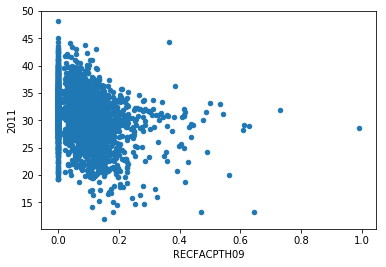

In [137]:
df_rec_ob.plot(x='RECFACPTH09', y='2011', kind='scatter', by='State')
plt.show()
#print (df_access_ob['Overall'])
#print (df_access_ob['2011'])

In [48]:
df_sto_health=pd.concat([df_sto, df_health_subset],axis=1)

C:\anaconda\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


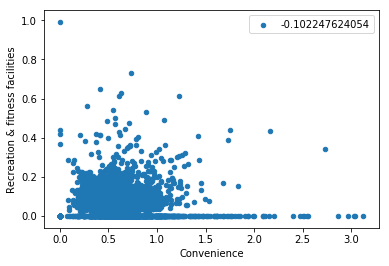

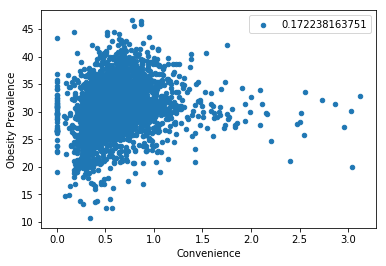

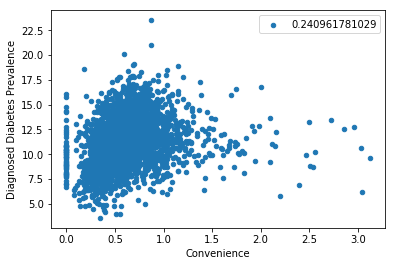

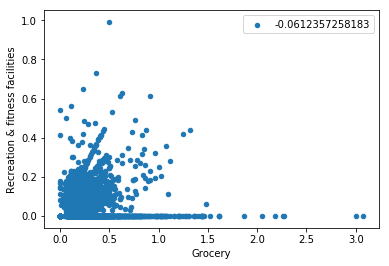

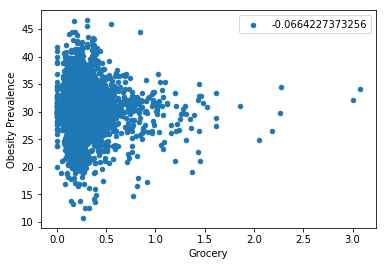

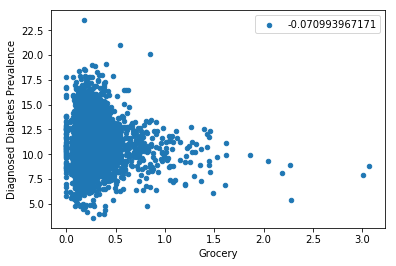

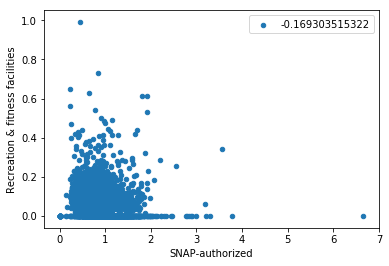

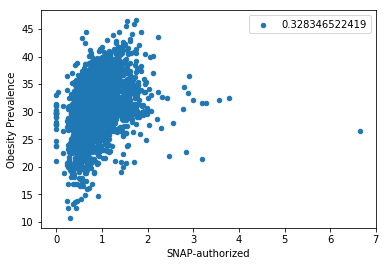

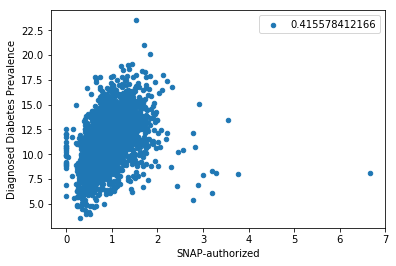

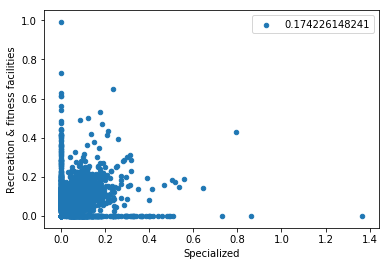

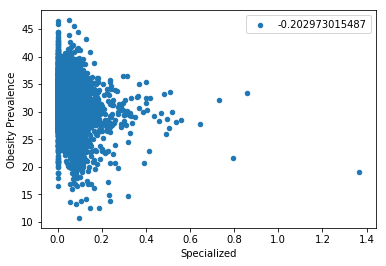

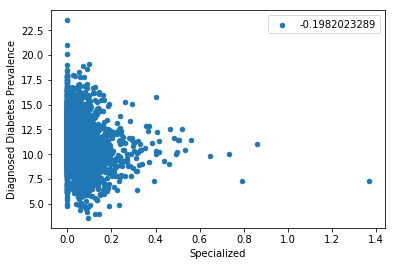

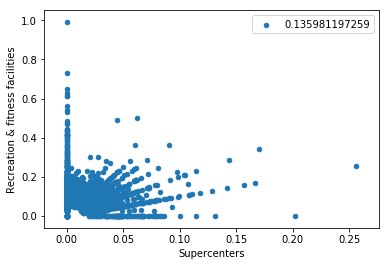

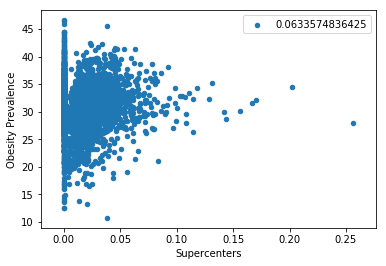

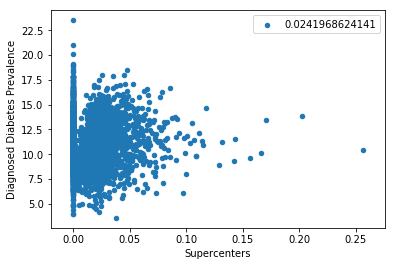

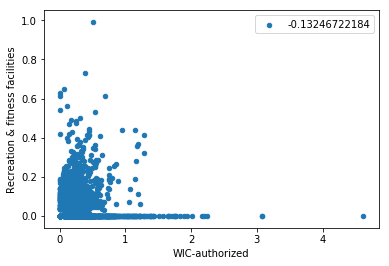

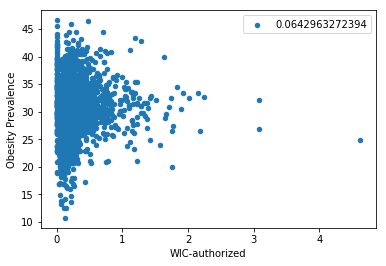

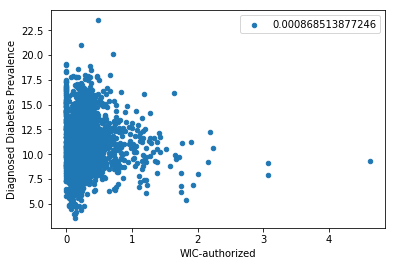

In [49]:
idx_pairs=[(c1,c2) for c1 in df_sto.columns for c2 in df_health_subset.columns]
for p in idx_pairs:
    plt.figure()
    df_sto_health.plot(x=p[0],y=p[1],kind='scatter',label=df_sto_health[p[0]].corr(df_sto_health[p[1]]))
    plt.xlabel(p[0][1])
    plt.ylabel(p[1][1])
    plt.legend()
plt.show()